In [1]:
import os

cwd = os.getcwd()

cwd

'/Users/qingye'

In [2]:
os.chdir('/Users/qingye/Desktop')

In [3]:
os.listdir('.')

['.Rhistory',
 'Questions.docx',
 '.DS_Store',
 'Data_V1_variable_view.xlsx',
 'tmj.2017.0123.pdf',
 '.localized',
 'opt-workshop.pdf',
 'Book1.xlsx',
 'Coping Strategies and Social Support in a Mobile Phone Chat App Designed to Support Smoking Cessation_ Qualitative Analysis.html',
 '~$reening questions.docx',
 'ml_map.png',
 'Note2.xlsx',
 'Coping Strategies and Social Support in a Mobile Phone Chat App Designed to Support Smoking Cessation_ Qualitative Analysis_files',
 'Note.xlsx',
 'ADA-example.docx',
 'Data_V1.xlsx',
 '8370_Project (4).pdf']

In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
# data analysis 
import pandas as pd
import numpy as np


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [6]:

file = 'Note.xlsx'

xl = pd.ExcelFile(file)

print(xl.sheet_names)


['HPI', 'IP', 'AllNote_HPI', 'AllNote_IP']


In [7]:
df1 = xl.parse('HPI')
df2 = xl.parse('IP')
df3 = xl.parse('AllNote_HPI')
df4 = xl.parse('AllNote_IP')

In [8]:
df3.head()

,patient,age,ageGroup,Sex,TypeDiabetes,hypertension,hyperlipidemia,CAD,InsulinTreatment,BMI,hbA1c,urbanRural,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,1,57,1,2,2,1,1,0,1,4,1,1,1.0,0.0,4.0,3.0,1.5,0.0,2.0
1,2,64,1,1,2,0,1,0,1,4,1,1,2.0,0.0,1.0,2.5,0.0,0.0,2.0
2,3,69,2,2,1,1,0,0,1,1,2,0,0.0,2.0,5.0,1.5,1.0,0.0,0.0
3,4,76,2,1,2,1,1,0,1,4,1,1,1.5,0.0,0.5,3.0,0.0,1.0,0.0
4,5,60,1,2,2,0,0,0,1,4,1,0,1.5,1.5,2.5,2.0,0.5,0.0,0.0


In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
patient             100 non-null int64
age                 100 non-null int64
ageGroup            100 non-null int64
Sex                 100 non-null int64
TypeDiabetes        100 non-null int64
hypertension        100 non-null int64
hyperlipidemia      100 non-null int64
CAD                 100 non-null int64
InsulinTreatment    100 non-null int64
BMI                 100 non-null int64
hbA1c               100 non-null int64
urbanRural          100 non-null int64
HealthyEating       100 non-null float64
BeingActive         100 non-null float64
Monitoring          100 non-null float64
TakingMedication    100 non-null float64
ProblemSolving      100 non-null float64
ReducingRisks       100 non-null float64
HealthyCoping       100 non-null float64
dtypes: float64(7), int64(12)
memory usage: 15.0 KB


In [10]:
df3.describe()

,patient,age,ageGroup,Sex,TypeDiabetes,hypertension,hyperlipidemia,CAD,InsulinTreatment,BMI,hbA1c,urbanRural,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,58.020000,1.320000,1.480000,1.860000,0.610000,0.400000,0.090000,0.740000,3.540000,1.470000,0.630000,0.585000,0.245000,2.610000,1.570000,0.695000,0.455000,0.270000
std,29.011492,13.881883,0.468826,0.502117,0.348735,0.490207,0.492366,0.287623,0.440844,0.821676,0.501614,0.485237,0.627867,0.534161,1.965074,0.958798,0.751749,0.647821,0.478951
min,1.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,52.750000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,50.500000,59.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,0.500000,0.000000,2.500000,1.500000,0.500000,0.000000,0.000000
75%,75.250000,67.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,0.500000
max,100.000000,86.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,3.000000,8.000000,4.000000,5.000000,2.500000,2.000000


## Data exploration

age groups(1: 18-64.9 yrs, 2: >=65yrs), 
Sex(1:male, 2:female), 
Type of Diabetes(1: type 1 diabetes, 2: type 2 diabete), 
hypertension(0: No, 1: Yes), 
hyperlipidemia(0: No, 1: Yes),
CAD(0: No, 1: Yes), 
Insulin Treatment(0: No, 1: Yes), 
BMI(1: BMI<18.5, 2: 18.5<=BMI<=24.9, 3 : 25<=BMI<=29.9, 4: BMI>=30),
HbA1c(1: <8%, 2: >=8%), 
urbanRural(0:urban, 1:rural)

In [11]:
# age groups(1: 18-64.9 yrs, 2: >=65yrs)
df3['ageGroup'].value_counts()

1    68
2    32
Name: ageGroup, dtype: int64

In [12]:
# The count of code of each principle in two age groups
df3[['ageGroup','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['ageGroup'], as_index=False).mean()

,ageGroup,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,1,0.602941,0.205882,2.647059,1.610294,0.742647,0.492647,0.301471
1,2,0.546875,0.328125,2.531250,1.484375,0.593750,0.375000,0.203125


In [13]:
# Sex(1:male, 2:female)
df3['Sex'].value_counts()

1    52
2    48
Name: Sex, dtype: int64

In [14]:
# The count of code of each principle in male and female
df3[['Sex','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['Sex'], as_index=False).mean()

,Sex,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,1,0.653846,0.288462,2.586538,1.605769,0.663462,0.50000,0.240385
1,2,0.510417,0.197917,2.635417,1.531250,0.729167,0.40625,0.302083


In [15]:
# Type of Diabetes(1: type 1 diabetes, 2: type 2 diabete)
df3['TypeDiabetes'].value_counts()

2    86
1    14
Name: TypeDiabetes, dtype: int64

In [16]:
# The count of code of each principle in type 1 and type 2 diabetes
df3[['TypeDiabetes','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['TypeDiabetes'], as_index=False).mean()

,TypeDiabetes,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,1,0.857143,0.357143,3.250000,1.750000,1.071429,0.678571,0.142857
1,2,0.540698,0.226744,2.505814,1.540698,0.633721,0.418605,0.290698


In [17]:
# Hypertension(0: No, 1: Yes)
df3['hypertension'].value_counts()

1    61
0    39
Name: hypertension, dtype: int64

In [18]:
# The count of code of each principle in patient with or without hypertension
df3[['hypertension','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['hypertension'], as_index=False).mean()

,hypertension,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,0,0.576923,0.320513,2.923077,1.461538,0.589744,0.538462,0.282051
1,1,0.590164,0.196721,2.409836,1.639344,0.762295,0.401639,0.262295


In [19]:
# hyperlipidemia(0: No, 1: Yes)
df3['hyperlipidemia'].value_counts()

0    60
1    40
Name: hyperlipidemia, dtype: int64

In [20]:
# The count of code of each principle in patient with or without hyperlipidemia
df3[['hyperlipidemia','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['hyperlipidemia'], as_index=False).mean()

,hyperlipidemia,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,0,0.6000,0.325,2.500,1.458333,0.766667,0.4000,0.258333
1,1,0.5625,0.125,2.775,1.737500,0.587500,0.5375,0.287500


In [21]:
# CAD(0: No, 1: Yes)
df3['CAD'].value_counts()

0    91
1     9
Name: CAD, dtype: int64

In [22]:
# The count of code of each principle in patient with or without CAD
df3[['CAD','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['CAD'], as_index=False).mean()

,CAD,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,0,0.593407,0.258242,2.67033,1.516484,0.692308,0.439560,0.285714
1,1,0.500000,0.111111,2.00000,2.111111,0.722222,0.611111,0.111111


In [23]:
# Insulin Treatment(0: No, 1: Yes)
df3['InsulinTreatment'].value_counts()

1    74
0    26
Name: InsulinTreatment, dtype: int64

In [24]:
# The count of code of each principle in patient with or without insulin treatment
df3[['InsulinTreatment','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['InsulinTreatment'], as_index=False).mean()

,InsulinTreatment,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,0,0.461538,0.326923,2.038462,1.211538,0.384615,0.307692,0.346154
1,1,0.628378,0.216216,2.810811,1.695946,0.804054,0.506757,0.243243


In [25]:
# BMI(1: BMI<18.5 underweight, 2: 18.5<=BMI<=24.9 normal weight, 3 : 25<=BMI<=29.9 overweight, 4: BMI>=30 obesity)
df3['BMI'].value_counts()

4    72
3    13
2    12
1     3
Name: BMI, dtype: int64

In [26]:
# Combine underweight, normal weight, and overweight into one group (not obesity = 0), obesity group = 1 
df3.loc[df3['BMI'] <= 3 , 'BMI'] = 0
df3.loc[df3['BMI'] > 3  , 'BMI'] = 1
df3['BMI'].head()

0    1
1    1
2    0
3    1
4    1
Name: BMI, dtype: int64

In [27]:
# The count of code of each principle in 4 levels of BMI
df3[['BMI','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['BMI'], as_index=False).mean()

,BMI,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,0,0.696429,0.214286,2.642857,1.517857,0.625000,0.517857,0.178571
1,1,0.541667,0.256944,2.597222,1.590278,0.722222,0.430556,0.305556


In [28]:
# HbA1c(1: <8%, 2: >=8%)
df3['hbA1c'].value_counts()

1    53
2    47
Name: hbA1c, dtype: int64

In [29]:
# The count of code of each principle in two groups of HbA1c
df3[['hbA1c','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['hbA1c'], as_index=False).mean()

,hbA1c,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,1,0.613208,0.264151,2.452830,1.490566,0.632075,0.481132,0.301887
1,2,0.553191,0.223404,2.787234,1.659574,0.765957,0.425532,0.234043


In [30]:
# urbanRural(0:urban, 1:rural)
df3['urbanRural'].value_counts()

1    63
0    37
Name: urbanRural, dtype: int64

In [31]:
# The count of code of each principle in urban and rural area
df3[['urbanRural','HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks','HealthyCoping']].groupby(['urbanRural'], as_index=False).mean()

,urbanRural,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,0,0.756757,0.391892,2.797297,1.689189,0.581081,0.418919,0.162162
1,1,0.484127,0.158730,2.500000,1.500000,0.761905,0.476190,0.333333


## Data Visualization

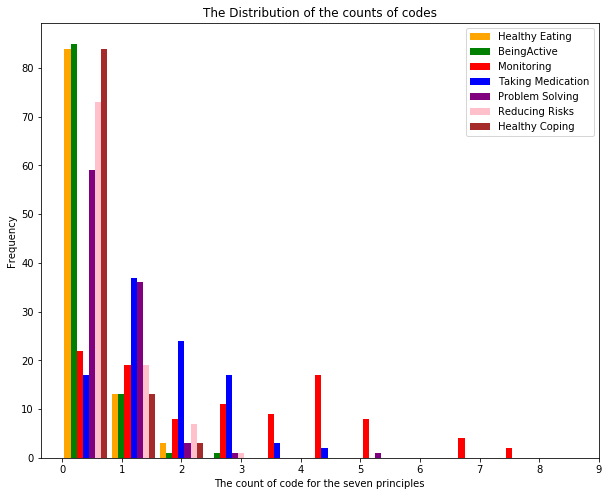

In [32]:
HC = df3['HealthyEating']
BA = df3['BeingActive']
M = df3['Monitoring']
TM = df3['TakingMedication']
PS = df3['ProblemSolving']
RR = df3['ReducingRisks']
HC = df3['HealthyCoping']
legend = ['Healthy Eating', 'BeingActive','Monitoring', 'Taking Medication', 'Problem Solving', 'Reducing Risks', 'Healthy Coping' ]
plt.figure(figsize=[10,8])
plt.hist([HC, BA, M, TM, PS, RR, HC], color=['orange', 'green','red', 'blue', 'purple', 'pink', 'brown'], rwidth=0.9)
plt.xlabel('The count of code for the seven principles')
plt.ylabel('Frequency')
plt.legend(legend)
plt.xticks(range(0,10))
#plt.yticks(range(0,100))
plt.title('The Distribution of the counts of codes')
plt.show()

## Data Preprocessing

In [33]:
# Replace the count of HealthyEating code into whether the Healthy Eating information were documented in each of the clinic notes
# The same for the Being Active, Monitoring, Taking Medication, Problem Solving, Reducing Risks, and Healthy Coping, replace the count of codes to the binary data
response = ['HealthyEating', 'BeingActive', 'Monitoring', 'TakingMedication', 'ProblemSolving','ReducingRisks', 'HealthyCoping']

for i in response:
    df3.loc[df3[i] > 0, i ] = 1

df3.head()

,patient,age,ageGroup,Sex,TypeDiabetes,hypertension,hyperlipidemia,CAD,InsulinTreatment,BMI,hbA1c,urbanRural,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,1,57,1,2,2,1,1,0,1,1,1,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,2,64,1,1,2,0,1,0,1,1,1,1,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,3,69,2,2,1,1,0,0,1,0,2,0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
3,4,76,2,1,2,1,1,0,1,1,1,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,5,60,1,2,2,0,0,0,1,1,1,0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
patient             100 non-null int64
age                 100 non-null int64
ageGroup            100 non-null int64
Sex                 100 non-null int64
TypeDiabetes        100 non-null int64
hypertension        100 non-null int64
hyperlipidemia      100 non-null int64
CAD                 100 non-null int64
InsulinTreatment    100 non-null int64
BMI                 100 non-null int64
hbA1c               100 non-null int64
urbanRural          100 non-null int64
HealthyEating       100 non-null float64
BeingActive         100 non-null float64
Monitoring          100 non-null float64
TakingMedication    100 non-null float64
ProblemSolving      100 non-null float64
ReducingRisks       100 non-null float64
HealthyCoping       100 non-null float64
dtypes: float64(7), int64(12)
memory usage: 15.0 KB


In [35]:
# Convert float to ints
df3[response]=df3[response].astype(int)
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
patient             100 non-null int64
age                 100 non-null int64
ageGroup            100 non-null int64
Sex                 100 non-null int64
TypeDiabetes        100 non-null int64
hypertension        100 non-null int64
hyperlipidemia      100 non-null int64
CAD                 100 non-null int64
InsulinTreatment    100 non-null int64
BMI                 100 non-null int64
hbA1c               100 non-null int64
urbanRural          100 non-null int64
HealthyEating       100 non-null int64
BeingActive         100 non-null int64
Monitoring          100 non-null int64
TakingMedication    100 non-null int64
ProblemSolving      100 non-null int64
ReducingRisks       100 non-null int64
HealthyCoping       100 non-null int64
dtypes: int64(19)
memory usage: 15.0 KB


,patient,age,ageGroup,Sex,TypeDiabetes,hypertension,hyperlipidemia,CAD,InsulinTreatment,BMI,hbA1c,urbanRural,HealthyEating,BeingActive,Monitoring,TakingMedication,ProblemSolving,ReducingRisks,HealthyCoping
0,1,57,1,2,2,1,1,0,1,1,1,1,1,0,1,1,1,0,1
1,2,64,1,1,2,0,1,0,1,1,1,1,1,0,1,1,0,0,1
2,3,69,2,2,1,1,0,0,1,0,2,0,0,1,1,1,1,0,0
3,4,76,2,1,2,1,1,0,1,1,1,1,1,0,1,1,0,1,0
4,5,60,1,2,2,0,0,0,1,1,1,0,1,1,1,1,1,0,0


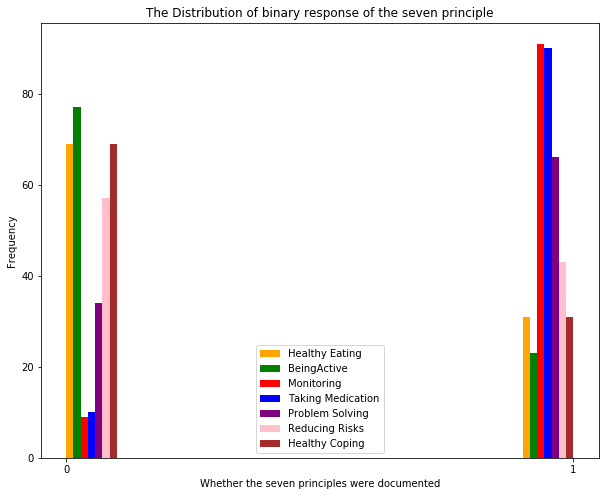

In [36]:
# After convert the response to binary data, the frequecy distribution of whether the information were documented across seven principles
HC = df3['HealthyEating']
BA = df3['BeingActive']
M = df3['Monitoring']
TM = df3['TakingMedication']
PS = df3['ProblemSolving']
RR = df3['ReducingRisks']
HC = df3['HealthyCoping']
legend = ['Healthy Eating', 'BeingActive','Monitoring', 'Taking Medication', 'Problem Solving', 'Reducing Risks', 'Healthy Coping' ]
plt.figure(figsize=[10,8])
plt.hist([HC, BA, M, TM, PS, RR, HC], color=['orange', 'green','red', 'blue', 'purple', 'pink', 'brown'], rwidth=5)
plt.xlabel('Whether the seven principles were documented')
plt.ylabel('Frequency')
plt.legend(legend)
plt.xticks(range(0,2))
#plt.yticks(range(0,100))
plt.title('The Distribution of binary response of the seven principle')
plt.show()

In [37]:
y1 = df3.HealthyEating
y2 = df3.BeingActive
y3 = df3.Monitoring
y4 = df3.TakingMedication
y5 = df3.ProblemSolving
y6 = df3.ReducingRisks
y7 = df3.HealthyCoping

features = ['ageGroup', 'Sex', 'TypeDiabetes', 'hypertension', 'hyperlipidemia', 'CAD', 'InsulinTreatment', 'BMI','hbA1c', 'urbanRural']
X = df3[features]

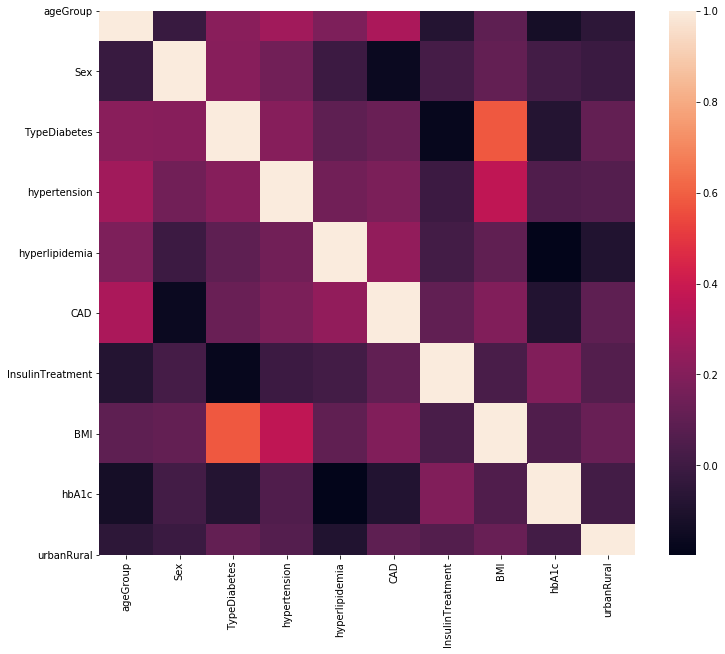

In [38]:
# the correlation of features
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr())

## Model, predict and sovle

In [39]:
# One-hot-encoding to transform all categorical data
#X = pd.get_dummies(X)

# Split into validation and training data
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2)
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.2)
X_train, X_test, y5_train, y5_test = train_test_split(X, y5, test_size=0.2)
X_train, X_test, y6_train, y6_test = train_test_split(X, y6, test_size=0.2)
X_train, X_test, y7_train, y7_test = train_test_split(X, y7, test_size=0.2)

In [40]:
print(X_train.shape)
print(X_test.shape)

(80, 10)
(20, 10)


In [41]:
print(y1_train.shape)
print(y1_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(80,)
(20,)
(80,)
(20,)


In [42]:
# Logistic Regression

#HealthyEating

logreg = LogisticRegression()
logreg.fit(X_train, y1_train)
y1_pred = logreg.predict(X_test)
#acc_log = round(logreg.score(X_train, y1_train) * 100, 2)
#print(acc_log)
print('Accuracy of logistic regression classifier on HealthyEating test set: {:.2f}'.format(logreg.score(X_test, y1_test)))


#BeingActive

logreg = LogisticRegression()
logreg.fit(X_train, y2_train)
y2_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y2_train) * 100, 2)
print(acc_log)
print('Accuracy of logistic regression classifier on BeingActive test set: {:.2f}'.format(logreg.score(X_test, y2_test)))


#Monitoring

logreg = LogisticRegression()
logreg.fit(X_train, y3_train)
y3_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y3_train) * 100, 2)
print(acc_log)
print('Accuracy of logistic regression classifier on Monitoring test set: {:.2f}'.format(logreg.score(X_test, y3_test)))


#TakingMedication

logreg = LogisticRegression()
logreg.fit(X_train, y4_train)
y4_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y4_train) * 100, 2)
print(acc_log)
print('Accuracy of logistic regression classifier on TakingMedication test set: {:.2f}'.format(logreg.score(X_test, y4_test)))


#ProblemSolving

logreg = LogisticRegression()
logreg.fit(X_train, y5_train)
y5_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y5_train) * 100, 2)
print(acc_log)
print('Accuracy of logistic regression classifier on ProblemSolving test set: {:.2f}'.format(logreg.score(X_test, y5_test)))


#ReducingRisks

logreg = LogisticRegression()
logreg.fit(X_train, y6_train)
y6_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y6_train) * 100, 2)
print(acc_log)
print('Accuracy of logistic regression classifier on ReducingRisks test set: {:.2f}'.format(logreg.score(X_test, y6_test)))


#HealthyCoping

logreg = LogisticRegression()
logreg.fit(X_train, y7_train)
y7_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y7_train) * 100, 2)
print(acc_log)
print('Accuracy of logistic regression classifier on HealthyCoping test set: {:.2f}'.format(logreg.score(X_test, y7_test)))

Accuracy of logistic regression classifier on HealthyEating test set: 0.45
77.5
Accuracy of logistic regression classifier on BeingActive test set: 0.85
88.75
Accuracy of logistic regression classifier on Monitoring test set: 0.95
88.75
Accuracy of logistic regression classifier on TakingMedication test set: 0.95
68.75
Accuracy of logistic regression classifier on ProblemSolving test set: 0.70
60.0
Accuracy of logistic regression classifier on ReducingRisks test set: 0.40
72.5
Accuracy of logistic regression classifier on HealthyCoping test set: 0.55


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [43]:
# Support Vector Machines

#HealthyEating

svc = SVC()
svc.fit(X_train, y1_train)
y1_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y1_train) * 100, 2)
print(acc_svc)
print('Accuracy of Support Vector Machines classifier on HealthyEating test set: {:.2f}'.format(svc.score(X_test, y1_test)))
      
    
# BeingActive

svc = SVC()
svc.fit(X_train, y2_train)
y2_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y2_train) * 100, 2)
print(acc_svc)
print('Accuracy of Support Vector Machines classifier on BeingActive test set: {:.2f}'.format(svc.score(X_test, y2_test)))
     
    
# Monitoring

svc = SVC()
svc.fit(X_train, y3_train)
y3_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, y3_train) * 100, 2)
#print(acc_svc)
print('Accuracy of Support Vector Machines classifier on Monitoring test set: {:.2f}'.format(svc.score(X_test, y3_test)))  


#Taking Medication

svc = SVC()
svc.fit(X_train, y4_train)
y4_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, y4_train) * 100, 2)
#print(acc_svc)
print('Accuracy of Support Vector Machines classifier on Taking Medication test set: {:.2f}'.format(svc.score(X_test, y4_test)))  


#Problem Solving

svc = SVC()
svc.fit(X_train, y5_train)
y5_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, y5_train) * 100, 2)
#print(acc_svc)
print('Accuracy of Support Vector Machines classifier on Problem Solving test set: {:.2f}'.format(svc.score(X_test, y5_test)))  


#Reducing Risks

svc = SVC()
svc.fit(X_train, y6_train)
y6_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, y6_train) * 100, 2)
#print(acc_svc)
print('Accuracy of Support Vector Machines classifier on Reducing Risks test set: {:.2f}'.format(svc.score(X_test, y6_test))) 


#Healthy Coping

svc = SVC()
svc.fit(X_train, y7_train)
y7_pred = svc.predict(X_test)
#acc_svc = round(svc.score(X_train, y7_train) * 100, 2)
#print(acc_svc)
print('Accuracy of Support Vector Machines classifier on Healthy Coping test set: {:.2f}'.format(svc.score(X_test, y7_test))) 



67.5
Accuracy of Support Vector Machines classifier on HealthyEating test set: 0.55
76.25
Accuracy of Support Vector Machines classifier on BeingActive test set: 0.80
Accuracy of Support Vector Machines classifier on Monitoring test set: 1.00
Accuracy of Support Vector Machines classifier on Taking Medication test set: 0.95
Accuracy of Support Vector Machines classifier on Problem Solving test set: 0.65
Accuracy of Support Vector Machines classifier on Reducing Risks test set: 0.65
Accuracy of Support Vector Machines classifier on Healthy Coping test set: 0.60


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [44]:
# k-Nearest Neighbors(KNN)

#HealthyEating

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y1_train)
y1_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y1_train) * 100, 2)
print(acc_knn)
print('Accuracy of KNN classifier on HealthyEating test set: {:.2f}'.format(knn.score(X_test, y1_test)))


#BeingActive

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y2_train)
y2_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y2_train) * 100, 2)
print(acc_knn)
print('Accuracy of KNN classifier on BeingActive test set: {:.2f}'.format(knn.score(X_test, y2_test)))


# Monitoring

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y3_train)
y3_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y3_train) * 100, 2)
print(acc_knn)
print('Accuracy of KNN classifier on Monitoring test set: {:.2f}'.format(knn.score(X_test, y3_test)))


#Taking Medication

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y4_train)
y4_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y4_train) * 100, 2)
print(acc_knn)
print('Accuracy of KNN classifier on Taking Medication test set: {:.2f}'.format(knn.score(X_test, y4_test)))


#Problem Solving

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y5_train)
y5_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y5_train) * 100, 2)
print(acc_knn)
print('Accuracy of KNN classifier on Problem Solving test set: {:.2f}'.format(knn.score(X_test, y5_test)))



#Reducing Risks

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y6_train)
y6_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y6_train) * 100, 2)
print(acc_knn)
print('Accuracy of KNN classifier on Reducing Risks test set: {:.2f}'.format(knn.score(X_test, y6_test)))


#Healthy Coping

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y7_train)
y7_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y7_train) * 100, 2)
print(acc_knn)
print('Accuracy of KNN classifier on Healthy Coping test set: {:.2f}'.format(knn.score(X_test, y7_test)))



77.5
Accuracy of KNN classifier on HealthyEating test set: 0.40
78.75
Accuracy of KNN classifier on BeingActive test set: 0.60
88.75
Accuracy of KNN classifier on Monitoring test set: 1.00
88.75
Accuracy of KNN classifier on Taking Medication test set: 0.95
73.75
Accuracy of KNN classifier on Problem Solving test set: 0.60
68.75
Accuracy of KNN classifier on Reducing Risks test set: 0.40
82.5
Accuracy of KNN classifier on Healthy Coping test set: 0.45


In [45]:
# Gaussian Naive Bayes

#Healthy Eating

gaussian = GaussianNB()
gaussian.fit(X_train, y1_train)
y1_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y1_train) * 100, 2)
print(acc_gaussian)
print('Accuracy of Gaussian Naive Bayes classifier on Healthy Eating test set: {:.2f}'.format(gaussian.score(X_test, y1_test)))


#Being Active

gaussian = GaussianNB()
gaussian.fit(X_train, y2_train)
y2_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y2_train) * 100, 2)
print(acc_gaussian)
print('Accuracy of Gaussian Naive Bayes classifier on Being Active test set: {:.2f}'.format(gaussian.score(X_test, y2_test)))


#Monitoring

gaussian = GaussianNB()
gaussian.fit(X_train, y3_train)
y3_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y3_train) * 100, 2)
print(acc_gaussian)
print('Accuracy of Gaussian Naive Bayes classifier on Monitoring test set: {:.2f}'.format(gaussian.score(X_test, y3_test)))


#Taking Medication

gaussian = GaussianNB()
gaussian.fit(X_train, y4_train)
y4_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y4_train) * 100, 2)
print(acc_gaussian)
print('Accuracy of Gaussian Naive Bayes classifier on Taking Medication test set: {:.2f}'.format(gaussian.score(X_test, y4_test)))


#Problem Solving

gaussian = GaussianNB()
gaussian.fit(X_train, y5_train)
y5_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y5_train) * 100, 2)
print(acc_gaussian)
print('Accuracy of Gaussian Naive Bayes classifier on Problem Solving test set: {:.2f}'.format(gaussian.score(X_test, y5_test)))


#Reducing Risks

gaussian = GaussianNB()
gaussian.fit(X_train, y6_train)
y6_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y6_train) * 100, 2)
print(acc_gaussian)
print('Accuracy of Gaussian Naive Bayes classifier on Reducing Risks test set: {:.2f}'.format(gaussian.score(X_test, y6_test)))


#Healthy Coping

gaussian = GaussianNB()
gaussian.fit(X_train, y7_train)
y7_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y7_train) * 100, 2)
print(acc_gaussian)
print('Accuracy of Gaussian Naive Bayes classifier on Healthy Coping test set: {:.2f}'.format(gaussian.score(X_test, y7_test)))




70.0
Accuracy of Gaussian Naive Bayes classifier on Healthy Eating test set: 0.40
73.75
Accuracy of Gaussian Naive Bayes classifier on Being Active test set: 0.70
51.25
Accuracy of Gaussian Naive Bayes classifier on Monitoring test set: 0.30
23.75
Accuracy of Gaussian Naive Bayes classifier on Taking Medication test set: 0.05
68.75
Accuracy of Gaussian Naive Bayes classifier on Problem Solving test set: 0.60
60.0
Accuracy of Gaussian Naive Bayes classifier on Reducing Risks test set: 0.30
65.0
Accuracy of Gaussian Naive Bayes classifier on Healthy Coping test set: 0.40


In [46]:
# Perceptron

# Healthy Eating

perceptron = Perceptron()
perceptron.fit(X_train, y1_train)
y1_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y1_train) * 100, 2)
print(acc_perceptron)
print('Accuracy of perceptron classifier on Healthy Eating test set: {:.2f}'.format(perceptron.score(X_test, y1_test)))


# Being Active

perceptron = Perceptron()
perceptron.fit(X_train, y2_train)
y2_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y2_train) * 100, 2)
print(acc_perceptron)
print('Accuracy of perceptron classifier on Being Active test set: {:.2f}'.format(perceptron.score(X_test, y2_test)))


#Monitoring

perceptron = Perceptron()
perceptron.fit(X_train, y3_train)
y3_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y3_train) * 100, 2)
print(acc_perceptron)
print('Accuracy of perceptron classifier on Monitoring test set: {:.2f}'.format(perceptron.score(X_test, y3_test)))


#Taking Medication

perceptron = Perceptron()
perceptron.fit(X_train, y4_train)
y4_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y4_train) * 100, 2)
print(acc_perceptron)
print('Accuracy of perceptron classifier on Taking Medication test set: {:.2f}'.format(perceptron.score(X_test, y4_test)))


#Problem Solving

perceptron = Perceptron()
perceptron.fit(X_train, y5_train)
y5_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y5_train) * 100, 2)
print(acc_perceptron)
print('Accuracy of perceptron classifier on Problem Solving test set: {:.2f}'.format(perceptron.score(X_test, y5_test)))


#Reducing Risks

perceptron = Perceptron()
perceptron.fit(X_train, y6_train)
y6_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y6_train) * 100, 2)
print(acc_perceptron)
print('Accuracy of perceptron classifier on Reducing Risks test set: {:.2f}'.format(perceptron.score(X_test, y6_test)))


#Healthy Coping

perceptron = Perceptron()
perceptron.fit(X_train, y7_train)
y7_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y7_train) * 100, 2)
print(acc_perceptron)
print('Accuracy of perceptron classifier on Healthy Coping test set: {:.2f}'.format(perceptron.score(X_test, y7_test)))


60.0
Accuracy of perceptron classifier on Healthy Eating test set: 0.40
77.5
Accuracy of perceptron classifier on Being Active test set: 0.80
91.25
Accuracy of perceptron classifier on Monitoring test set: 0.90
86.25
Accuracy of perceptron classifier on Taking Medication test set: 0.85
72.5
Accuracy of perceptron classifier on Problem Solving test set: 0.60
56.25
Accuracy of perceptron classifier on Reducing Risks test set: 0.30
71.25
Accuracy of perceptron classifier on Healthy Coping test set: 0.60


In [47]:
# Linear SVC

# Healthy Eating

linear_svc = LinearSVC()
linear_svc.fit(X_train, y1_train)
y1_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y1_train) * 100, 2)
print(acc_linear_svc)
print('Accuracy of Linear SVC classifier on Healthy Eating test set: {:.2f}'.format(linear_svc.score(X_test, y1_test)))


# Being Active

linear_svc = LinearSVC()
linear_svc.fit(X_train, y2_train)
y2_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y2_train) * 100, 2)
print(acc_linear_svc)
print('Accuracy of Linear SVC classifier on Being Active test set: {:.2f}'.format(linear_svc.score(X_test, y2_test)))


# Monitoring

linear_svc = LinearSVC()
linear_svc.fit(X_train, y3_train)
y3_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y3_train) * 100, 2)
print(acc_linear_svc)
print('Accuracy of Linear SVC classifier on Monitoring test set: {:.2f}'.format(linear_svc.score(X_test, y3_test)))


#Taking Medication

linear_svc = LinearSVC()
linear_svc.fit(X_train, y4_train)
y4_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y4_train) * 100, 2)
print(acc_linear_svc)
print('Accuracy of Linear SVC classifier on Taking Medication test set: {:.2f}'.format(linear_svc.score(X_test, y4_test)))


#Problem Solving

linear_svc = LinearSVC()
linear_svc.fit(X_train, y5_train)
y5_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y5_train) * 100, 2)
print(acc_linear_svc)
print('Accuracy of Linear SVC classifier on Problem Solving test set: {:.2f}'.format(linear_svc.score(X_test, y5_test)))


#Reducing Risks

linear_svc = LinearSVC()
linear_svc.fit(X_train, y6_train)
y6_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y6_train) * 100, 2)
print(acc_linear_svc)
print('Accuracy of Linear SVC classifier on Reducing Risks test set: {:.2f}'.format(linear_svc.score(X_test, y6_test)))


#Healthy Coping

linear_svc = LinearSVC()
linear_svc.fit(X_train, y7_train)
y7_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y7_train) * 100, 2)
print(acc_linear_svc)
print('Accuracy of Linear SVC classifier on Healthy Coping test set: {:.2f}'.format(linear_svc.score(X_test, y7_test)))


75.0
Accuracy of Linear SVC classifier on Healthy Eating test set: 0.45
80.0
Accuracy of Linear SVC classifier on Being Active test set: 0.80
91.25
Accuracy of Linear SVC classifier on Monitoring test set: 0.95
88.75
Accuracy of Linear SVC classifier on Taking Medication test set: 0.95
67.5
Accuracy of Linear SVC classifier on Problem Solving test set: 0.60
60.0
Accuracy of Linear SVC classifier on Reducing Risks test set: 0.40
73.75
Accuracy of Linear SVC classifier on Healthy Coping test set: 0.45


In [48]:
# Stochastic Gradient Descent

#Healthy Eating

sgd = SGDClassifier()
sgd.fit(X_train, y1_train)
y1_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y1_train) * 100, 2)
print(acc_sgd)
print('Accuracy of Stochastic Gradient Descent classifier on Healthy Eating test set: {:.2f}'.format(sgd.score(X_test, y1_test)))


# Being Active

sgd = SGDClassifier()
sgd.fit(X_train, y2_train)
y2_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y2_train) * 100, 2)
print(acc_sgd)
print('Accuracy of Stochastic Gradient Descent classifier on Being Active test set: {:.2f}'.format(sgd.score(X_test, y2_test)))


# Monitoring

sgd = SGDClassifier()
sgd.fit(X_train, y3_train)
y3_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y3_train) * 100, 2)
print(acc_sgd)
print('Accuracy of Stochastic Gradient Descent classifier on Monitoring test set: {:.2f}'.format(sgd.score(X_test, y3_test)))


# Taking Medication

sgd = SGDClassifier()
sgd.fit(X_train, y4_train)
y4_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y4_train) * 100, 2)
print(acc_sgd)
print('Accuracy of Stochastic Gradient Descent classifier on Taking Medication test set: {:.2f}'.format(sgd.score(X_test, y4_test)))


# Problem Solving

sgd = SGDClassifier()
sgd.fit(X_train, y5_train)
y5_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y5_train) * 100, 2)
print(acc_sgd)
print('Accuracy of Stochastic Gradient Descent classifier on Problem Solving test set: {:.2f}'.format(sgd.score(X_test, y5_test)))


# Reducing Risks

sgd = SGDClassifier()
sgd.fit(X_train, y6_train)
y6_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y6_train) * 100, 2)
print(acc_sgd)
print('Accuracy of Stochastic Gradient Descent classifier on Reducing Risks test set: {:.2f}'.format(sgd.score(X_test, y6_test)))


# Healthy Coping

sgd = SGDClassifier()
sgd.fit(X_train, y7_train)
y7_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y7_train) * 100, 2)
print(acc_sgd)
print('Accuracy of Stochastic Gradient Descent classifier on Healthy Coping test set: {:.2f}'.format(sgd.score(X_test, y7_test)))



55.0
Accuracy of Stochastic Gradient Descent classifier on Healthy Eating test set: 0.60
76.25
Accuracy of Stochastic Gradient Descent classifier on Being Active test set: 0.80
90.0
Accuracy of Stochastic Gradient Descent classifier on Monitoring test set: 0.95
87.5
Accuracy of Stochastic Gradient Descent classifier on Taking Medication test set: 0.95
48.75
Accuracy of Stochastic Gradient Descent classifier on Problem Solving test set: 0.35
45.0
Accuracy of Stochastic Gradient Descent classifier on Reducing Risks test set: 0.35
71.25
Accuracy of Stochastic Gradient Descent classifier on Healthy Coping test set: 0.60


In [49]:
# Decision Tree

# Healthy Eating

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y1_train)
y1_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y1_train) * 100, 2)
print(acc_decision_tree)
print('Accuracy of Decision Tree classifier on Healthy Eating test set: {:.2f}'.format(decision_tree.score(X_test, y1_test)))


# Being Active

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y2_train)
y2_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y2_train) * 100, 2)
print(acc_decision_tree)
print('Accuracy of Decision Tree classifier on Being Active test set: {:.2f}'.format(decision_tree.score(X_test, y2_test)))


# Monitoring

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y3_train)
y3_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y3_train) * 100, 2)
print(acc_decision_tree)
print('Accuracy of Decision Tree classifier on Monitoring test set: {:.2f}'.format(decision_tree.score(X_test, y3_test)))


# Taking Medication

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y4_train)
y4_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y4_train) * 100, 2)
print(acc_decision_tree)
print('Accuracy of Decision Tree classifier on Taking Medication test set: {:.2f}'.format(decision_tree.score(X_test, y4_test)))


# Problem Solving

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y5_train)
y5_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y5_train) * 100, 2)
print(acc_decision_tree)
print('Accuracy of Decision Tree classifier on Problem Solving test set: {:.2f}'.format(decision_tree.score(X_test, y5_test)))


# Reducing Risks

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y6_train)
y6_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y6_train) * 100, 2)
print(acc_decision_tree)
print('Accuracy of Decision Tree classifier on Reducing Risks test set: {:.2f}'.format(decision_tree.score(X_test, y6_test)))


# Healthy Coping

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y7_train)
y7_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y7_train) * 100, 2)
print(acc_decision_tree)
print('Accuracy of Decision Tree classifier on Healthy Coping test set: {:.2f}'.format(decision_tree.score(X_test, y7_test)))



93.75
Accuracy of Decision Tree classifier on Healthy Eating test set: 0.45
97.5
Accuracy of Decision Tree classifier on Being Active test set: 0.70
98.75
Accuracy of Decision Tree classifier on Monitoring test set: 0.90
98.75
Accuracy of Decision Tree classifier on Taking Medication test set: 0.75
95.0
Accuracy of Decision Tree classifier on Problem Solving test set: 0.50
93.75
Accuracy of Decision Tree classifier on Reducing Risks test set: 0.45
96.25
Accuracy of Decision Tree classifier on Healthy Coping test set: 0.35


In [50]:
# Random Forest


# Healthy Eating

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y1_train)
y1_pred = random_forest.predict(X_test)
random_forest.score(X_train, y1_train)
acc_random_forest = round(random_forest.score(X_train, y1_train) * 100, 2)
print(acc_random_forest)
print('Accuracy of Random Forest classifier on Healthy Eating test set: {:.2f}'.format(random_forest.score(X_test, y1_test)))


# Being Active

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y2_train)
y2_pred = random_forest.predict(X_test)
random_forest.score(X_train, y2_train)
acc_random_forest = round(random_forest.score(X_train, y2_train) * 100, 2)
print(acc_random_forest)
print('Accuracy of Random Forest classifier on Being Active test set: {:.2f}'.format(random_forest.score(X_test, y2_test)))


# Monitoring

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y3_train)
y3_pred = random_forest.predict(X_test)
random_forest.score(X_train, y3_train)
acc_random_forest = round(random_forest.score(X_train, y3_train) * 100, 2)
print(acc_random_forest)
print('Accuracy of Random Forest classifier on Monitoring test set: {:.2f}'.format(random_forest.score(X_test, y3_test)))


# Taking Medication

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y4_train)
y4_pred = random_forest.predict(X_test)
random_forest.score(X_train, y4_train)
acc_random_forest = round(random_forest.score(X_train, y4_train) * 100, 2)
print(acc_random_forest)
print('Accuracy of Random Forest classifier on Taking Medication test set: {:.2f}'.format(random_forest.score(X_test, y4_test)))


# Problem Solving

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y5_train)
y5_pred = random_forest.predict(X_test)
random_forest.score(X_train, y5_train)
acc_random_forest = round(random_forest.score(X_train, y5_train) * 100, 2)
print(acc_random_forest)
print('Accuracy of Random Forest classifier on Problem Solving test set: {:.2f}'.format(random_forest.score(X_test, y5_test)))


# Reducing Risks

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y6_train)
y6_pred = random_forest.predict(X_test)
random_forest.score(X_train, y6_train)
acc_random_forest = round(random_forest.score(X_train, y6_train) * 100, 2)
print(acc_random_forest)
print('Accuracy of Random Forest classifier on Reducing Risks test set: {:.2f}'.format(random_forest.score(X_test, y6_test)))


# Healthy Coping

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y7_train)
y7_pred = random_forest.predict(X_test)
random_forest.score(X_train, y7_train)
acc_random_forest = round(random_forest.score(X_train, y7_train) * 100, 2)
print(acc_random_forest)
print('Accuracy of Random Forest classifier on Healthy Coping test set: {:.2f}'.format(random_forest.score(X_test, y7_test)))



93.75
Accuracy of Random Forest classifier on Healthy Eating test set: 0.50
97.5
Accuracy of Random Forest classifier on Being Active test set: 0.65
98.75
Accuracy of Random Forest classifier on Monitoring test set: 0.90
98.75
Accuracy of Random Forest classifier on Taking Medication test set: 0.85
95.0
Accuracy of Random Forest classifier on Problem Solving test set: 0.50
93.75
Accuracy of Random Forest classifier on Problem Solving test set: 0.50
96.25
Accuracy of Random Forest classifier on Problem Solving test set: 0.40


In [51]:
# Model evaluation

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,96.25
8,Decision Tree,96.25
1,KNN,82.50
0,Support Vector Machines,76.25
7,Linear SVC,73.75
2,Logistic Regression,72.50
5,Perceptron,71.25
6,Stochastic Gradient Decent,71.25
4,Naive Bayes,65.00
